In [1]:
# Calling Matplot library
import matplotlib.pyplot as plt
# Calling Numpy Library
import numpy as np

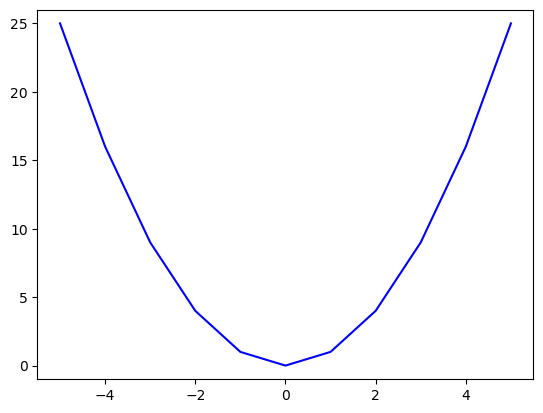

In [6]:
plt.plot([-5,-4,-3,-2,-1,0,1, 2, 3, 4,5], [25,16,9,4,1,0,1, 4, 9, 16,25], 'b')
# b is for blue, o is symbol type
plt.axis([-5.5, 5.5, -1, 26])    # Ranges of x and y-axis
plt.show()

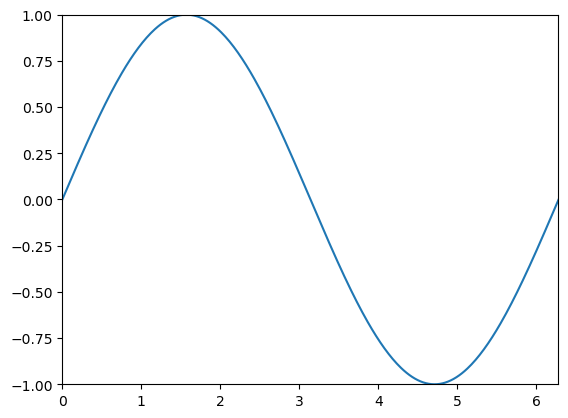

In [14]:
x=np.linspace(0,2.0*np.pi,360) # Generating x points as NumPy array from 0 to 360 on step of 1 degree
y=np.sin(x)                    # Defining y = sin(x) 
plt.plot(x,y)
plt.axis([0, 6.28, -1,1])
plt.show()

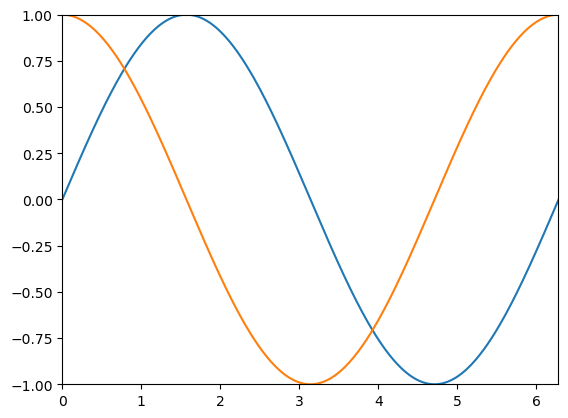

In [19]:
x=np.linspace(0,2.0*np.pi,360)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axis([0, 6.28, -1,1])
plt.show()

(0.0, 6.28, -1.0, 1.0)

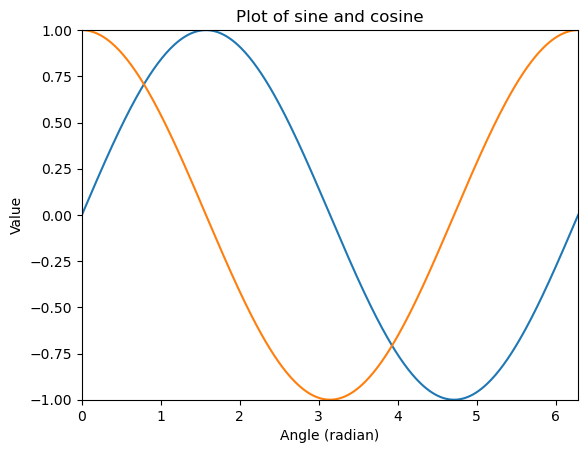

In [12]:
x=np.linspace(0,2.0*np.pi,360)
y1=np.sin(x) # first function
y2=np.cos(x) # second function
plt.xlabel('Angle (radian)') # x-axis label
plt.ylabel('Value') # y-axis label
plt.title('Plot of sine and cosine') # title of the plot
plt.plot(x,y1) # plotting first function
plt.plot(x,y2) # plotting second function
plt.axis([0, 6.28, -1,1]) # range of x-axis and y-axis
plt.show() # display the plot

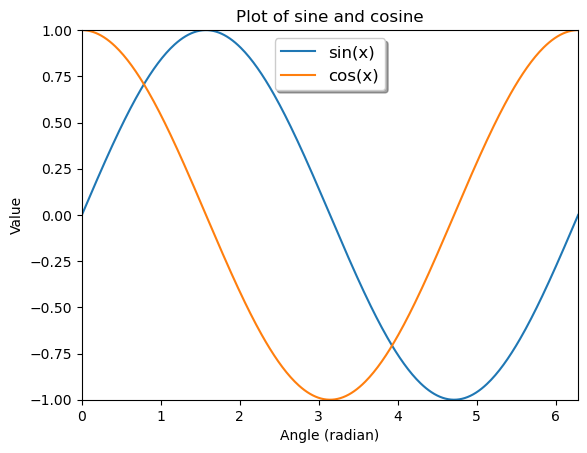

In [19]:
# Same Canvas, two funxtions with legends
x=np.linspace(0,2.0*np.pi,360)
y1=np.sin(x) # first function
y2=np.cos(x) # second function
plt.xlabel('Angle (radian)') # x-axis label
plt.ylabel('Value') # y-axis label
plt.title('Plot of sine and cosine') # title of the plot
plt.plot(x,y1, label='sin(x)') # plotting first function
plt.plot(x,y2, label='cos(x)') # plotting second function
# Legend in action
# The strings 'upper left', 'upper right', 'lower left', 'lower right' place the legend at the corresponding corner of the axes.
legend = plt.legend(loc='upper center', shadow=False, fontsize='large')
plt.axis([0, 6.28, -1,1]) # range of x-axis and y-axis
plt.show() # display the plot

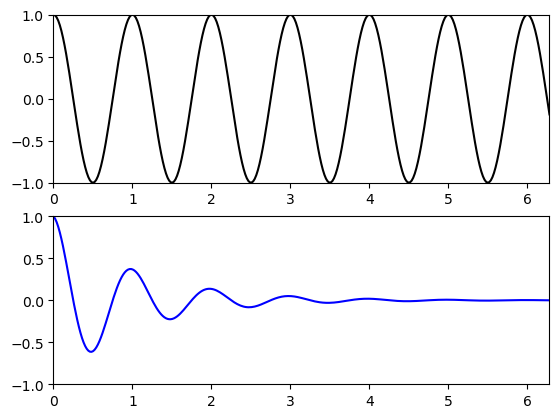

In [33]:
# Plotting two plots (subplot) in one canvas, Arranged top and bottom
# Example of damped and undamped harmonic oscillator
def dho(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

x = np.linspace(0.0, 6.28, 314)
y1 = dho(x)
y2 = np.cos(2*np.pi*x)

plt.figure()
plt.subplot(212)
plt.axis([0, 6.28, -1,1])
plt.plot(x, y1, 'b')

plt.subplot(211)
plt.plot(x, y2, 'k')
plt.axis([0, 6.28, -1,1])
plt.show()

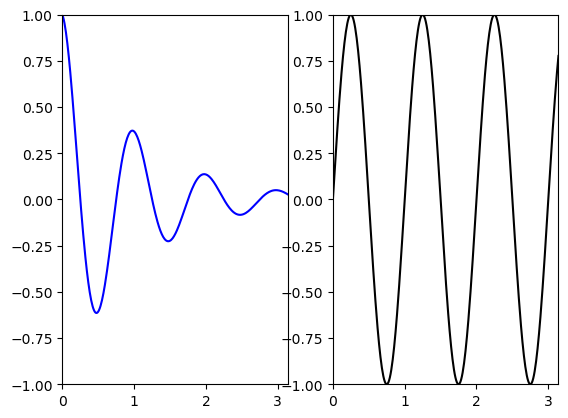

In [38]:
# Plotting two plots (subplot) in one canvas, Arranged Left and Right
# Example of damped and undamped harmonic oscillator
def dho(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

x = np.linspace(0.0, np.pi, 314)
y1 = dho(x)
y2 = np.sin(2*np.pi*x)

plt.figure()
plt.subplot(121)
plt.axis([0, 3.14, -1,1])
plt.plot(x, y1, 'b')

plt.subplot(122)
plt.plot(x, y2, 'k')
plt.axis([0, 3.14, -1,1])
plt.show()

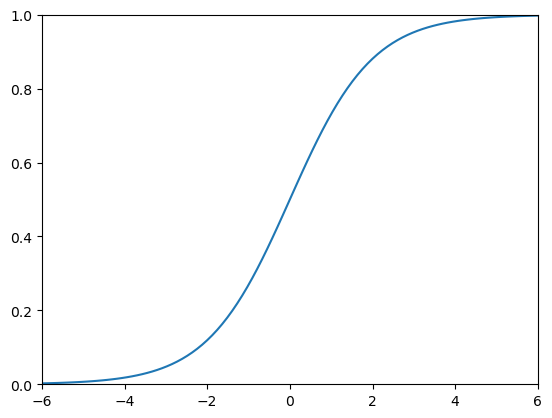

In [40]:
# Sigmoid plot, very useful for the Deep Learning
# ref: https://en.wikipedia.org/wiki/Sigmoid_function
x=np.linspace(-6.0,6.0,100)

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

y=sigmoid(x)
plt.plot(x,y)
plt.axis([-6.0, 6.0, 0,1])
plt.show()

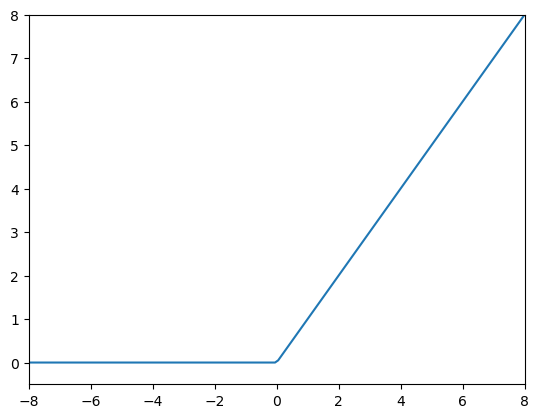

In [11]:
# rectified linear function
def reLU(a):
 return max(0.0, a)
 
# define a series of inputs
x = [a for a in np.linspace(-8.0, 8.0,160)]
# calculate outputs for inputs
y = [reLU(a) for a in x]
plt.plot(x,y)
plt.axis([-8.0, 8.0, -0.5,8])
plt.show()

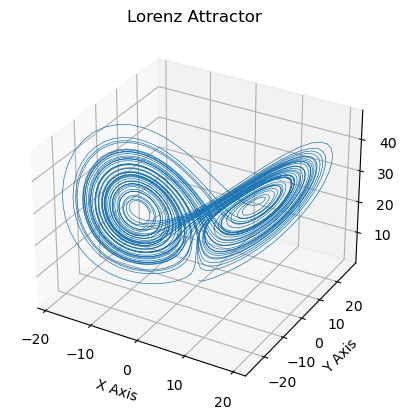

In [10]:
# Lorentz Attractor (Butterfly Effect)
def lorenz(xyz, *, s=9, r=26, b=3.14):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 5000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0.1, 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

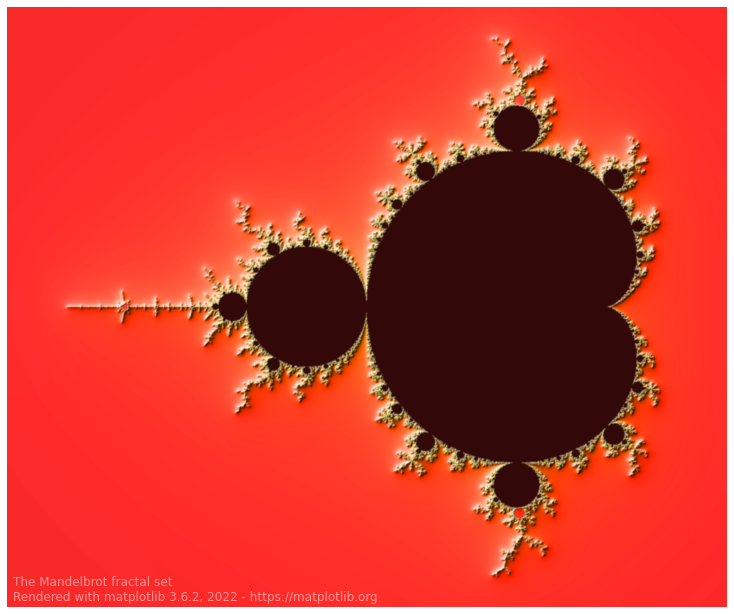

In [11]:
# Fractals shape
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://web.archive.org/web/20160331171238/https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - https://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()